# Natural Language Processing - Text Summarization example

###### Links: [CNN DailyMail (HuggingFace)](https://huggingface.co/datasets/cnn_dailymail)

### 0 - Setup

###### Import pckgs

In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils2 import *

###### Import data

In [3]:
#import datasets
#dataset = datasets.load_dataset("cnn_dailymail", '3.0.0')

#lst_dics = [dic for dic in dataset["train"]]
#dtf = pd.DataFrame(lst_dics).rename(columns={"article":"text", "highlights":"y"})[["text","y"]].head(20000)
#dtf.to_csv("data_summary.csv", index=False)
#dtf.head()

In [14]:
import tensorflow_datasets as tfds
dataset_train = pd.DataFrame(tfds.load( 'cnn_dailymail',split='train',batch_size=-1))
dataset_test = pd.DataFrame(tfds.load( 'cnn_dailymail',split='test',batch_size=-1))

In [69]:
dtf=dataset_train.copy()

NameError: name 'dataset_train' is not defined

In [70]:
dtf = pd.read_csv("cnn_dailymail.csv")
dtf.head()

,Unnamed: 0,text,y
0,0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...
4,4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...


In [12]:
dtf.head()

,Unnamed: 0,text,y
0,0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...
4,4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...


In [137]:
dtf = dtf.rename({'article':'text','highlights':'y'},axis=1)
dtf.drop(['id','publisher'],axis=1)

,text,y
0,"b""By. Associated Press. PUBLISHED:. 14:11 EST,...","b'Bishop John Folda, of North Dakota, is takin..."
1,b'(CNN) -- Ralph Mata was an internal affairs ...,b'Criminal complaint: Cop used his role to hel...
2,"b""A drunk driver who killed a young woman in a...","b""Craig Eccleston-Todd, 27, had drunk at least..."
3,"b""(CNN) -- With a breezy sweep of his pen Pres...","b""Nina dos Santos says Europe must be ready to..."
4,"b""Fleetwood are the only team still to have a ...",b'Fleetwood top of League One after 2-0 win at...
...,...,...
287108,"b""By. James Rush. Former first daughter Chelse...","b""Chelsea Clinton said question of running for..."
287109,"b""An apologetic Vanilla Ice has given his firs...","b""Vanilla Ice, 47 - real name Robert Van Winkl..."
287110,b'America\'s most lethal sniper claimed he wis...,"b""America's most lethal sniper made comment in..."
287111,"b""By. Sara Malm. PUBLISHED:. 12:19 EST, 8 Marc...","b""A swarm of more than one million has crossed..."


In [72]:
# check
i = 3
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["y"][i])

--- Full text ---
Los Angeles (CNN) -- A medical doctor in Vancouver, British Columbia, said Thursday that California arson suspect Harry Burkhart suffered from severe mental illness in 2010, when she examined him as part of a team of doctors. Dr. Blaga Stancheva, a family physician and specialist in obstetrics, said both Burkhart and his mother, Dorothee, were her patients in Vancouver while both were applying for refugee status in Canada. "I was asked to diagnose and treat Harry to support a claim explaining why he was unable to show up in a small-claims court case," Stancheva told CNN in a phone interview. She declined to cite the case or Burkhart's role in it. Stancheva said she and other doctors including a psychiatrist diagnosed Burkhart with "autism, severe anxiety, post-traumatic stress disorder and depression." The diagnosis was spelled out in a letter she wrote for the small-claims court case, Stancheva said. Stancheva, citing doctor-patient confidentiality, would not elabora

In [29]:
dtf = dtf.head(100)

### 1 - Text Analysis

- Text cleaning
- Word frequency
- Length analysis

###### Text cleaning

In [73]:
lst_stopwords = create_stopwords()
lst_stopwords = lst_stopwords + ["cnn","say","said","new","wa","ha"]

In [74]:
dtf = add_preprocessed_text(dtf, column="text", 
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf = add_preprocessed_text(dtf, column="y", 
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf.head()

,Unnamed: 0,text,y,text_clean,y_clean
0,0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...,official president barack obama want lawmaker ...,syrian official obama climbed top tree doe kno...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...,usain bolt rounded world championship sunday c...,usain bolt win third gold world championship a...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...,kansa city missouri general service administra...,employee agency kansa city office among hundre...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...,los angeles medical doctor vancouver british c...,canadian doctor part team examining harry burk...
4,4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...,police arrested another teen thursday sixth su...,another arrest made gang rape outside californ...


In [75]:
# check
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["y_clean"][i])

--- Full text ---
los angeles medical doctor vancouver british columbia thursday california arson suspect harry burkhart suffered severe mental illness 2010 examined part team doctor dr blaga stancheva family physician specialist obstetrics burkhart mother dorothee patient vancouver applying refugee status canada asked diagnose treat harry support claim explaining unable show smallclaims court case stancheva told phone interview declined cite case burkharts role stancheva doctor including psychiatrist diagnosed burkhart autism severe anxiety posttraumatic stress disorder depression diagnosis spelled letter wrote smallclaims court case stancheva stancheva citing doctorpatient confidentiality would elaborate would identify psychiatrist involved diagnosis burkhart 24yearold german national charged 37 count arson following string 52 fire los angeles charge connection arson fire 12 location scattered hollywood west hollywood sherman oak according authority stancheva refugee application burk

###### Word frequency

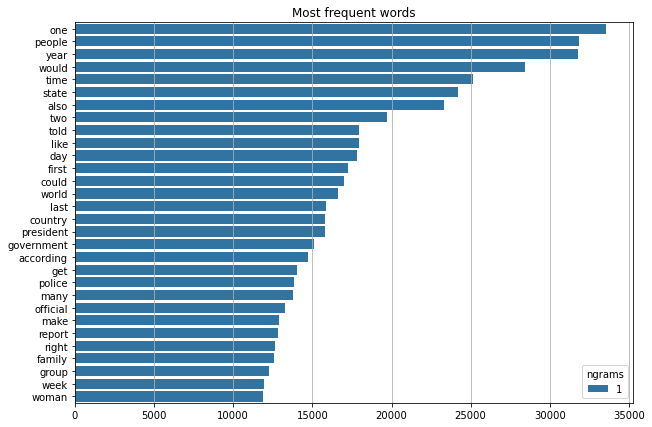

In [76]:
# Find most common words in text
dtf_freq = word_freq(corpus=dtf["text_clean"], ngrams=[1], top=30, figsize=(10,7))

In [78]:
thres = 5
X_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
X_top_words

10246

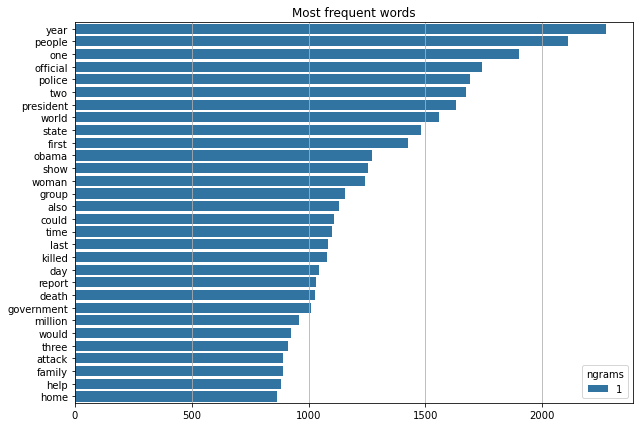

In [77]:
# Find most common words in summaries
dtf_freq = word_freq(corpus=dtf["y_clean"], ngrams=[1], top=30, figsize=(10,7))

In [79]:
thres = 5
y_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
y_top_words

10246

###### Length analysis

In [80]:
# Texts
X = add_text_length(dtf, "text_clean")

                            min         mean          max
char_count           103.000000  2260.440850  10038.00000
word_count            19.000000   364.190450   1309.00000
sentence_count         1.000000     1.000000      1.00000
avg_word_length        3.992945     6.204663     35.34507
avg_sentence_lenght   19.000000   364.190450   1309.00000


In [ ]:
plot_distributions(X, x="word_count", figsize=(10,3))

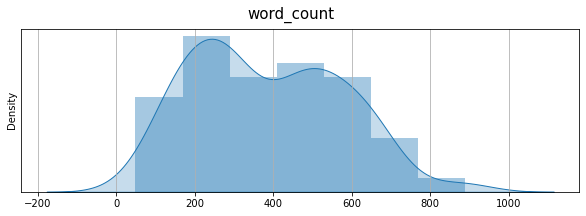

In [67]:
plot_distributions(X, x="word_count", figsize=(10,3))

In [39]:
X_len = 384

In [40]:
# Summaries
y = add_text_length(dtf, "y_clean")

                       min        mean        max
char_count           44.00  165.480000  234.00000
word_count            7.00   27.010000   41.00000
sentence_count        1.00    1.000000    1.00000
avg_word_length       4.85    6.146624    7.52381
avg_sentence_lenght   7.00   27.010000   41.00000


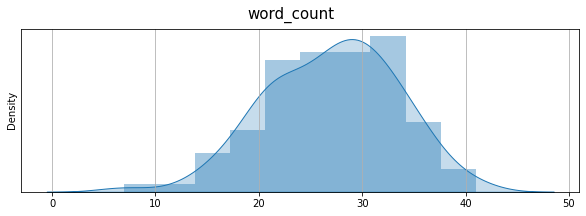

In [66]:
plot_distributions(y, x="word_count", max_cat=1, figsize=(10,3))

In [42]:
y_len = 27

###### Summary

In [18]:
dtf = dtf[["text","text_clean","y","y_clean"]]
dtf.head()

,text,text_clean,y,y_clean
0,It's official: U.S. President Barack Obama wan...,official president barack obama want lawmaker ...,Syrian official: Obama climbed to the top of t...,syrian official obama climbed top tree doe kno...
1,(CNN) -- Usain Bolt rounded off the world cham...,usain bolt rounded world championship sunday c...,Usain Bolt wins third gold of world championsh...,usain bolt win third gold world championship a...
2,"Kansas City, Missouri (CNN) -- The General Ser...",kansa city missouri general service administra...,The employee in agency's Kansas City office is...,employee agency kansa city office among hundre...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,los angeles medical doctor vancouver british c...,NEW: A Canadian doctor says she was part of a ...,canadian doctor part team examining harry burk...
4,(CNN) -- Police arrested another teen Thursday...,police arrested another teen thursday sixth su...,Another arrest made in gang rape outside Calif...,another arrest made gang rape outside californ...


### 2 - Preprocessing

In [43]:
# Partitioning
dtf_train = dtf.iloc[i+1:]
dtf_test = dtf.iloc[:i+1]
#dtf_test

In [180]:
# Partitioning
from sklearn.model_selection import train_test_split
dtf_train, dtf_test = train_test_split(dtf, test_size=0.1, random_state=0)

In [44]:
dtf_train

,Unnamed: 0,text,y,text_clean,y_clean
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...,kansa city missouri general service administra...,employee agency kansa city office among hundre...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...,los angeles medical doctor vancouver british c...,canadian doctor part team examining harry burk...
4,4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...,police arrested another teen thursday sixth su...,another arrest made gang rape outside californ...
5,5,(CNN) -- Thousands on Saturday fled the area i...,"Humanitarian groups expect 4,000 refugees in o...",thousand saturday fled area southwestern ivory...,humanitarian group expect 4000 refugee one cam...
6,6,(CNN) -- Four groups that advocate for immigra...,NEW: 4 groups announce legal challenge in Phoe...,four group advocate immigrant right thursday c...,4 group announce legal challenge phoenix ameri...
...,...,...,...,...,...
95,95,President Barack Obama signed an executive ord...,Executive order bars contractors covers LGBT e...,president barack obama signed executive order ...,executive order bar contractor cover lgbt empl...
96,96,Editor's note: This is an excerpt from the Feb...,"In rural Africa, there is love for soccer but ...",editor note excerpt february issue national ge...,rural africa love soccer sometimes lack resour...
97,97,(CNN) -- The International Olympic Committee h...,It's the first time a ban of a national commit...,international olympic committee reinstated ind...,first time ban national committee lifted olymp...
98,98,(Mother Nature Network) -- Mother's Day poems ...,Poets have long written about their mothers or...,mother nature network mother day poem come sha...,poet long written mother mother robert louis s...


### 3 - Baseline (Extractive: TextRank)

In [45]:
#dtf_test.text = dtf_test.text.apply(lambda x: x.decode('utf-8'))
dtf_train = dtf.iloc[i+1:]
dtf_test = dtf.iloc[:i+1]
dtf_test

,Unnamed: 0,text,y,text_clean,y_clean
0,0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...,official president barack obama want lawmaker ...,syrian official obama climbed top tree doe kno...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...,usain bolt rounded world championship sunday c...,usain bolt win third gold world championship a...


In [56]:
dtf_train

,Unnamed: 0,text,y,text_clean,y_clean
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...,kansa city missouri general service administra...,employee agency kansa city office among hundre...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...,los angeles medical doctor vancouver british c...,canadian doctor part team examining harry burk...
4,4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...,police arrested another teen thursday sixth su...,another arrest made gang rape outside californ...
5,5,(CNN) -- Thousands on Saturday fled the area i...,"Humanitarian groups expect 4,000 refugees in o...",thousand saturday fled area southwestern ivory...,humanitarian group expect 4000 refugee one cam...
6,6,(CNN) -- Four groups that advocate for immigra...,NEW: 4 groups announce legal challenge in Phoe...,four group advocate immigrant right thursday c...,4 group announce legal challenge phoenix ameri...
...,...,...,...,...,...
95,95,President Barack Obama signed an executive ord...,Executive order bars contractors covers LGBT e...,president barack obama signed executive order ...,executive order bar contractor cover lgbt empl...
96,96,Editor's note: This is an excerpt from the Feb...,"In rural Africa, there is love for soccer but ...",editor note excerpt february issue national ge...,rural africa love soccer sometimes lack resour...
97,97,(CNN) -- The International Olympic Committee h...,It's the first time a ban of a national commit...,international olympic committee reinstated ind...,first time ban national committee lifted olymp...
98,98,(Mother Nature Network) -- Mother's Day poems ...,Poets have long written about their mothers or...,mother nature network mother day poem come sha...,poet long written mother mother robert louis s...


In [47]:
dtf_test.text = dtf_test.text.apply(lambda x: x.decode('utf-8'))

AttributeError: 'str' object has no attribute 'decode'

In [59]:
# Test (no Train)
predicted = textrank(corpus=dtf_test["text"], ratio=y_len/X_len)

In [23]:
dtf_test

,Unnamed: 0,text,y,text_clean,y_clean
0,0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...,official president barack obama want lawmaker ...,syrian official obama climbed top tree doe kno...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...,usain bolt rounded world championship sunday c...,usain bolt win third gold world championship a...


In [60]:
# Evaluate
evaluate_summary(dtf_test.y[i], predicted[i])

rouge1: 0.18 | rouge2: 0.04 | rougeL: 0.04 --> avg rouge: 0.14


In [64]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [65]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 4 - Model (Abstractive: Seq2Seq)

###### Features Engineering

--- tokenization ---
43004 words
--- padding to sequence ---
19998 sequences of length 400


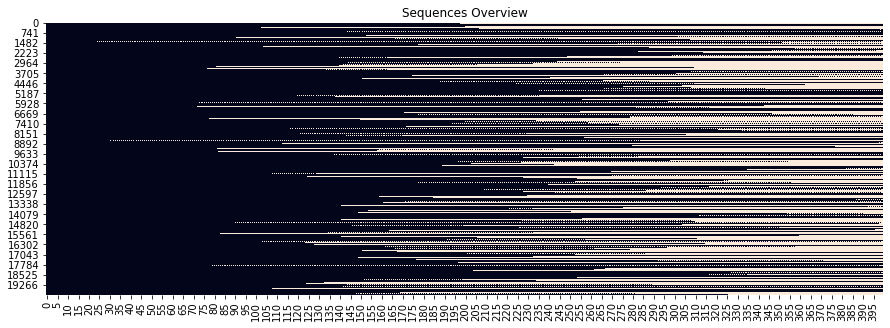

In [22]:
# Create X_train for seq2seq (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], top=X_top_words, maxlen=X_len)

X_train, X_tokenizer, X_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [23]:
dict(list(X_dic_vocabulary.items())[0:6])

{'<PAD>': 0, 'one': 1, 'people': 2, 'year': 3, 'would': 4, 'time': 5}

--- tokenization ---
--- padding to sequence ---
2 sequences of length 400


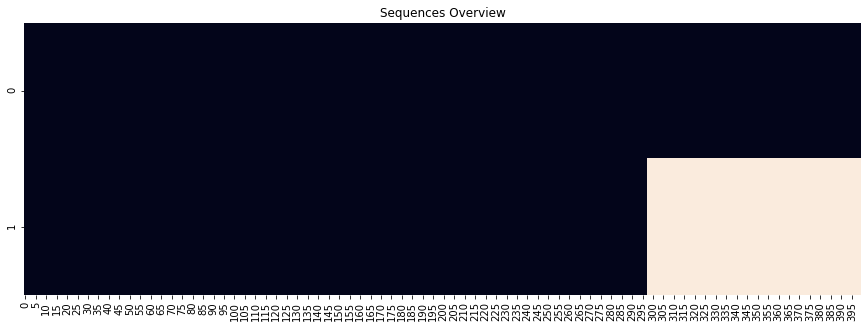

In [24]:
# Preprocess X_test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], fitted_tokenizer=X_tokenizer, maxlen=X_train.shape[1])

In [25]:
# Add START and END tokens to the summaries (y)
special_tokens = ("<START>", "<END>")
dtf_train["y_clean"] = dtf_train['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"] = dtf_test['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"][i]

'<START> usain bolt win third gold world championship anchor jamaica 4x100m relay victory eighth gold championship bolt jamaica double woman 4x100m relay <END>'

--- tokenization ---
10248 words
--- padding to sequence ---
19998 sequences of length 40


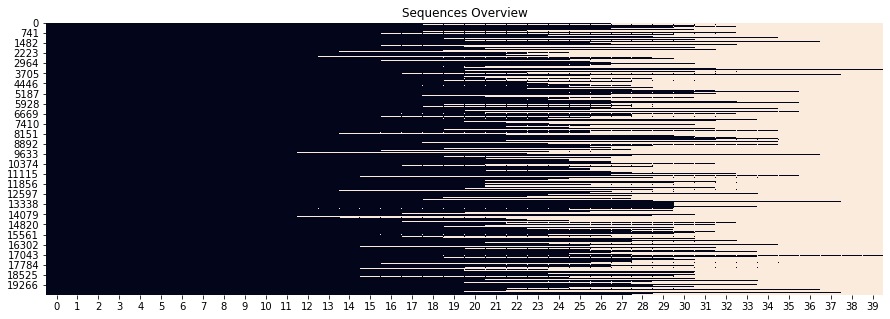

In [26]:
# Tokenize the summaries (y_train)
dic_seq = text2seq(corpus=dtf_train["y_clean"], top=y_top_words, maxlen=y_len)

y_train, y_tokenizer, y_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [27]:
dict(list(y_dic_vocabulary.items())[0:6])

{'<PAD>': 0, '<START>': 1, '<END>': 2, 'year': 3, 'people': 4, 'one': 5}

--- tokenization ---
--- padding to sequence ---
2 sequences of length 40


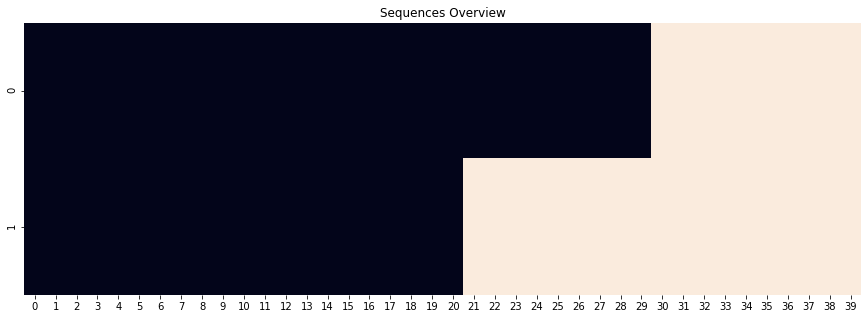

In [28]:
# Preprocess y_test with the same tokenizer
y_test = text2seq(corpus=dtf_test["y_clean"], fitted_tokenizer=y_tokenizer, maxlen=y_train.shape[1])

###### Create Embedding Weights

In [31]:
# Load pre-trained Word2Vec
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [ ]:
# Or train Word2Vec from scratch
#corpus =  dtf_train["text_clean"].append(dtf_train["y_clean"])
#lst_corpus, nlp = fit_w2v(corpus=corpus, min_count=1, size=300, window=y_avg_len)

In [32]:
# check nlp model
word = "home"
nlp[word].shape

(300,)

In [33]:
X_embeddings = vocabulary_embeddings(X_dic_vocabulary, nlp)
X_embeddings.shape

vocabulary mapped to 43005 vectors of size 300


(43005, 300)

In [34]:
y_embeddings = vocabulary_embeddings(y_dic_vocabulary, nlp)
y_embeddings.shape

vocabulary mapped to 10249 vectors of size 300


(10249, 300)

###### Model Design

In [36]:
# Basic Seq2Seq
lstm_units = 250
embeddings_size = 300

##------------ ENCODER (embeddings + lstm) -----------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=len(X_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
x_emb = layer_x_emb(x_in)
### lstm 
layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, dropout=0.4,  
                           return_sequences=True, return_state=True)
x_out, state_h, state_c = layer_x_lstm(x_emb)

##------------ DECODER (embeddings + lstm + dense) ---------------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=len(y_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
y_emb = layer_y_emb(y_in)
### lstm 
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, dropout=0.4,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE --------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 400)]        0                                            
__________________________________________________________________________________________________
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 400, 300)     12901200    x_in[0][0]                       
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    3074400     y_in[0][0]                       
____________________________________________________________________________________________

In [35]:
# Advanced Seq2Seq
lstm_units = 250

##------------ ENCODER (pre-trained embeddings + 3 bi-lstm) ---------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### bi-lstm 1
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True), 
                                      name="x_lstm_1")
x_out, _, _, _, _ = layer_x_bilstm(x_emb)
### bi-lstm 2
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_2")
x_out, _, _, _, _ = layer_x_bilstm(x_out)
### bi-lstm 3 (here final states are collected)
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4, 
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_3")
x_out, forward_h, forward_c, backward_h, backward_c = layer_x_bilstm(x_out)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])

##------------ DECODER (pre-trained embeddings + lstm + dense) ------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units*2, dropout=0.2, recurrent_dropout=0.2,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE ------------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 400)]        0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 400, 300)     12901500    x_in[0][0]                       
__________________________________________________________________________________________________
x_lstm_1 (Bidirectional)        [(None, 400, 500), ( 1102000     x_emb[0][0]                      
__________________________________________________________________________________________________
x_lstm_2 (Bidirectional)        [(None, 400, 500), ( 1502000     x_lstm_1[0][0]                   
____________________________________________________________________________________________

###### Train

Epoch 1/100
219/219 [==============================] - 355s 2s/step - loss: 5.4287 - accuracy: 0.3696 - val_loss: 5.2587 - val_accuracy: 0.3759
Epoch 2/100
219/219 [==============================] - 355s 2s/step - loss: 5.1787 - accuracy: 0.3801 - val_loss: 5.1966 - val_accuracy: 0.3771
Epoch 3/100
219/219 [==============================] - 357s 2s/step - loss: 5.0799 - accuracy: 0.3826 - val_loss: 5.1201 - val_accuracy: 0.3802
Epoch 4/100
219/219 [==============================] - 809s 4s/step - loss: 4.9903 - accuracy: 0.3858 - val_loss: 5.0544 - val_accuracy: 0.3821
Epoch 5/100
219/219 [==============================] - 358s 2s/step - loss: 4.8997 - accuracy: 0.3883 - val_loss: 4.9996 - val_accuracy: 0.3839
Epoch 6/100
219/219 [==============================] - 356s 2s/step - loss: 4.8151 - accuracy: 0.3907 - val_loss: 4.9544 - val_accuracy: 0.3858
Epoch 7/100
219/219 [==============================] - 355s 2s/step - loss: 4.7357 - accuracy: 0.3931 - val_loss: 4.9188 - val_accuracy:

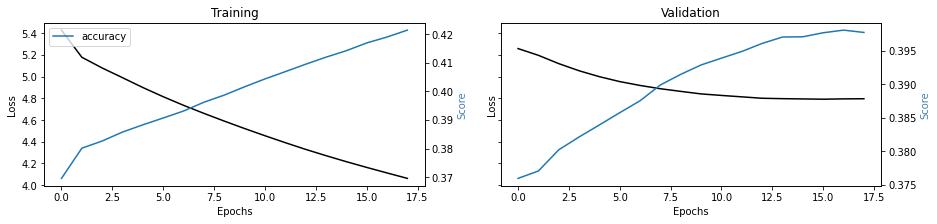

In [37]:
# This takes a while
model = fit_seq2seq(X_train, y_train, model, build_encoder_decoder=False, 
                    epochs=100, batch_size=64, verbose=1)
#model, encoder_model, decoder_model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
#                                                  build_encoder_decoder=True, epochs=100, batch_size=64)

###### Test

In [38]:
# Prediction Encoder
encoder_model = models.Model(inputs=x_in, outputs=[x_out, state_h, state_c], name="Prediction_Encoder")
encoder_model.summary()

Model: "Prediction_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_in (InputLayer)            [(None, 400)]             0         
_________________________________________________________________
x_emb (Embedding)            (None, 400, 300)          12901200  
_________________________________________________________________
x_lstm (LSTM)                [(None, 400, 250), (None, 551000    
Total params: 13,452,200
Trainable params: 13,452,200
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Prediction Decoder
## double the lstm units if you used bidirectional lstm
lstm_units = lstm_units*2 if any("Bidirectional" in str(layer) for layer in model.layers) else lstm_units

## states of the previous time step
x_out2 = layers.Input(shape=(X_train.shape[1], lstm_units))
state_h, state_c = layers.Input(shape=(lstm_units,)), layers.Input(shape=(lstm_units,))

## decoder embeddings
y_emb2 = layer_y_emb(y_in)

## lstm to predict the next word
y_out2, new_state_h, new_state_c = layer_y_lstm(y_emb2, initial_state=[state_h, state_c])

## softmax to generate probability distribution over the target vocabulary
probs = layer_dense(y_out2)

## compile
decoder_model = models.Model(inputs=[y_in, x_out2, state_h, state_c], 
                             outputs=[probs, new_state_h, new_state_c],
                             name="Prediction_Decoder")
decoder_model.summary()

Model: "Prediction_Decoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    3074400     y_in[0][0]                       
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 250)]        0                                            
_________________________________________________________________________________

In [40]:
predicted = predict_seq2seq(X_test, encoder_model, decoder_model, y_tokenizer, special_tokens)

In [41]:
# Evaluate
evaluate_summary(dtf_test["y_clean"][i], predicted[i])

rouge1: 0.04 | rouge2: 0.0 | rougeL: 0.0 --> avg rouge: 0.03


In [42]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [43]:
# Explainability
match = display_string_matching(dtf_test["text_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 5 - Model (Abstractive: Language model)

In [74]:
# Test (no Train)
predicted = bart(corpus=dtf_test["text"], max_len=y_len)

In [75]:
# Evaluate
evaluate_summary(dtf_test["y"][i], predicted[i])

rouge1: 0.57 | rouge2: 0.26 | rougeL: 0.26 --> avg rouge: 0.49


In [76]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [77]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))